# Finite Square Well Bound State
This notebook uses the technique from the Solving the Schrödinger Equation notebook to calculate the bound states for a finite square well. There are only a few changes to the square well solution. The potential is different, in that it has a small area which is not zero but some negative value, here $-V_0$. For our calculation to be approximately correct, we need to make sure that our entire calculation space, from $-a/2$ to $a/2$ is much larger than the well, wich is from $-b/2.$ to $b/2$. The factor 100 I choose here is probably more than needed. We also need a fairly large $N$, the number of steps in our space, so that the resulting wave function is smooth in the area of the well. You may need to be somewhat patient when evaluating the well with these settings!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 4097
a = 200.0
b = 2.
x = np.linspace(-a/2.,a/2.,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
V0 = -6.
V=np.zeros(N)
for i in range(N):
    if x[i]> -b/2. and x[i]< b/2.:
        V[i]= V0

Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]
#

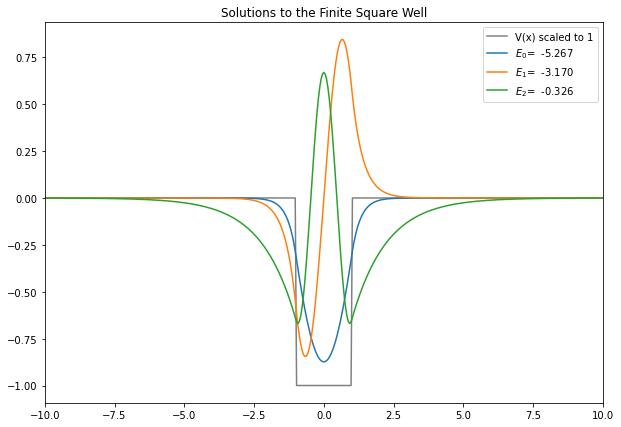

In [2]:
plt.figure(figsize=(10,7))
plt.xlim((-5*b,5*b))
plt.plot(x,V/(-V0),color="Gray",label="V(x) scaled to 1")
for i in range(5):
    if E[i]<0:                 # Only plot the bound states. The scattering states are not reliably computed.
        if psi[i][N-10] < 0:   # Flip the wavefunctions if it is negative at large x, so plots are more consistent.
            plt.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
        else:
            plt.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
plt.title("Solutions to the Finite Square Well")
plt.legend()
plt.savefig("Finite_Square_Well_WaveFunctions.pdf")
plt.show()
